In [1]:
pip install import-ipynb


Note: you may need to restart the kernel to use updated packages.


In [2]:
import import_ipynb
import AnalisisCartas
import AnalisisMazos
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import json
import os

from pymongo import MongoClient

importing Jupyter notebook from AnalisisCartas.ipynb
importing Jupyter notebook from AnalisisMazos.ipynb


In [4]:
warnings.filterwarnings("ignore", category=FutureWarning)

## En este punto leeremos los datos desde mongoDB desde las clases analisis

In [7]:
analisisC = AnalisisCartas.CardAnalisis()
dfCartas = analisisC.get_dataframe()

analisisD = AnalisisMazos.DeckAnalisis()
dfMazos = analisisD.get_dataframe()

In [6]:
#La información nos muestra cada carta como una columna
print(dfCartas.info())
#Usaremos la funcion transpose de nuestro dataframe para usar los datos como columnas y las cartas como filas
#dfCartas = dfCartas.transpose()
#print(dfCartas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19519 entries, 6690f7356f4d5805d69e5330 to 6690f7376f4d5805d69ea322
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   colorIdentity          19519 non-null  object
 1   colors                 19519 non-null  object
 2   convertedManaCost      19519 non-null  object
 3   edhrecRank             19304 non-null  object
 4   foreignData            19519 non-null  object
 5   layout                 19519 non-null  object
 6   legalities             19519 non-null  object
 7   manaCost               18705 non-null  object
 8   mtgoFoilId             12622 non-null  object
 9   mtgoId                 14889 non-null  object
 10  name                   19519 non-null  object
 11  printings              19519 non-null  object
 12  purchaseUrls           17898 non-null  object
 13  rulings                19519 non-null  object
 14  scryfallOracleId       19519 non-

In [7]:
#Visualizacion del dataframe
dfCartas.columns

Index(['colorIdentity', 'colors', 'convertedManaCost', 'edhrecRank',
       'foreignData', 'layout', 'legalities', 'manaCost', 'mtgoFoilId',
       'mtgoId', 'name', 'printings', 'purchaseUrls', 'rulings',
       'scryfallOracleId', 'subtypes', 'supertypes', 'text', 'type', 'types',
       'uuid', 'mtgArenaId', 'power', 'toughness', 'faceConvertedManaCost',
       'names', 'side', 'isReserved', 'leadershipSkills', 'loyalty',
       'colorIndicator', 'hasNoDeckLimit'],
      dtype='object')

In [8]:
dfCartas

,colorIdentity,colors,convertedManaCost,edhrecRank,foreignData,layout,legalities,manaCost,mtgoFoilId,mtgoId,...,power,toughness,faceConvertedManaCost,names,side,isReserved,leadershipSkills,loyalty,colorIndicator,hasNoDeckLimit
6690f7356f4d5805d69e5330,[B],[B],2.0,13417,"[{'language': 'German', 'name': 'Verlust der H...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{X}{1}{B},9992,9991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6690f7356f4d5805d69e5331,[R],[R],3.0,7558,"[{'language': 'German', 'name': 'Abkehr von de...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{R},61409,61408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6690f7356f4d5805d69e5332,[W],[],0.0,12416,"[{'language': 'German', 'name': 'Aufgegebener ...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",NaN,16468,16467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6690f7356f4d5805d69e5333,[],[],3.0,6972,"[{'flavorText': 'Was einst ruhte, ruht nicht m...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3},64841,64840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6690f7356f4d5805d69e5334,[B],[B],4.0,9906,[{'flavorText': '死は彼の人間性を奪ったが、包丁使いの腕までは奪わなかった。...,normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3}{B},NaN,NaN,...,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690f7376f4d5805d69ea31e,"[B, U]",[U],2.0,18731,"[{'language': 'German', 'name': 'Zuranischer V...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{1}{U},NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6690f7376f4d5805d69ea31f,[],[],0.0,1760,[],normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{0},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6690f7376f4d5805d69ea320,[U],[U],3.0,9265,"[{'language': 'German', 'name': 'Zuranischer Z...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{U},NaN,24481,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6690f7376f4d5805d69ea321,[R],[R],1.0,6287,"[{'language': 'German', 'name': 'Zurgo Glocken...",normal,"{'commander': 'Legal', 'duel': 'Restricted', '...",{R},56051,56050,...,2,2,NaN,NaN,NaN,NaN,"{'brawl': False, 'commander': True, 'oathbreak...",NaN,NaN,NaN


## El dataframe ya se encuentra listo para poder realizar visualizaciones de los datos

Grafica de las catas por el coste de mana convertido

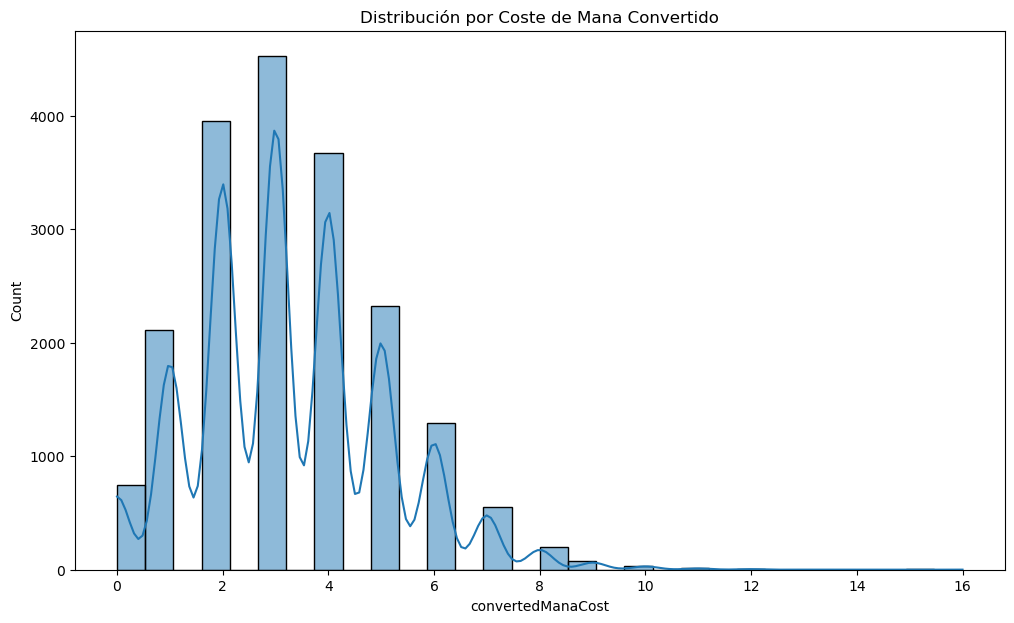

In [11]:
plt.figure(figsize=(12,7))
sns.histplot(dfCartas['convertedManaCost'], bins=30, kde=True)
plt.title('Distribución por Coste de Mana Convertido')
plt.show()

# En el siguiente gráfico relizaremos un conteo de las cartas tanto por su identidad de color y color para asi ver la diferencia

In [13]:
#Agrupamos la columna de indentidad de color
agrupacionIdentidadColores = dfCartas['colorIdentity'].apply(lambda x: ''.join(sorted(x)))
conteoIdentidadColores = agrupacionIdentidadColores.value_counts()
#Agrupamos la columna colores
agrupacionColores = dfCartas['colors'].apply(lambda x: ''.join(sorted(x)))
conteoColores = agrupacionColores.value_counts()

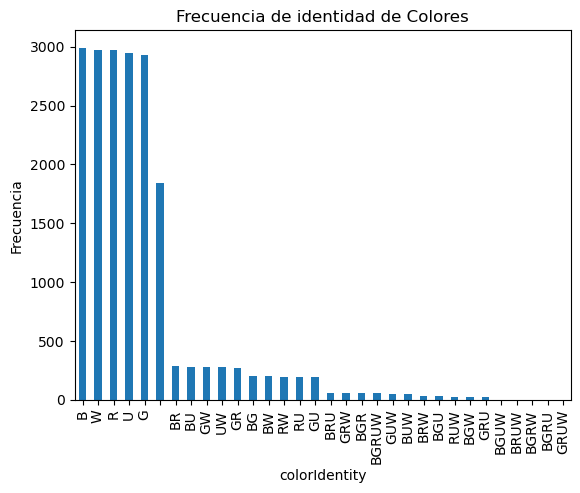

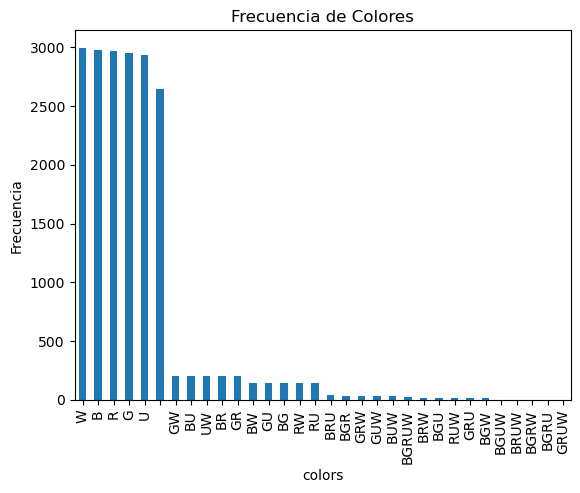

In [14]:
#Mostraremos ambos graficos para poder ver las diferencias
conteoIdentidadColores.plot(kind='bar')
plt.xlabel('colorIdentity')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de identidad de Colores')
plt.show()

conteoColores.plot(kind='bar')
plt.xlabel('colors')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Colores')
plt.show()

# Para el último gráfico realizaremos uno de tipo "pie"

Lo crearemos conteando la cantidad de cartas legales de cada formato para asi ver el porcentage de cartas que tiene cada formato

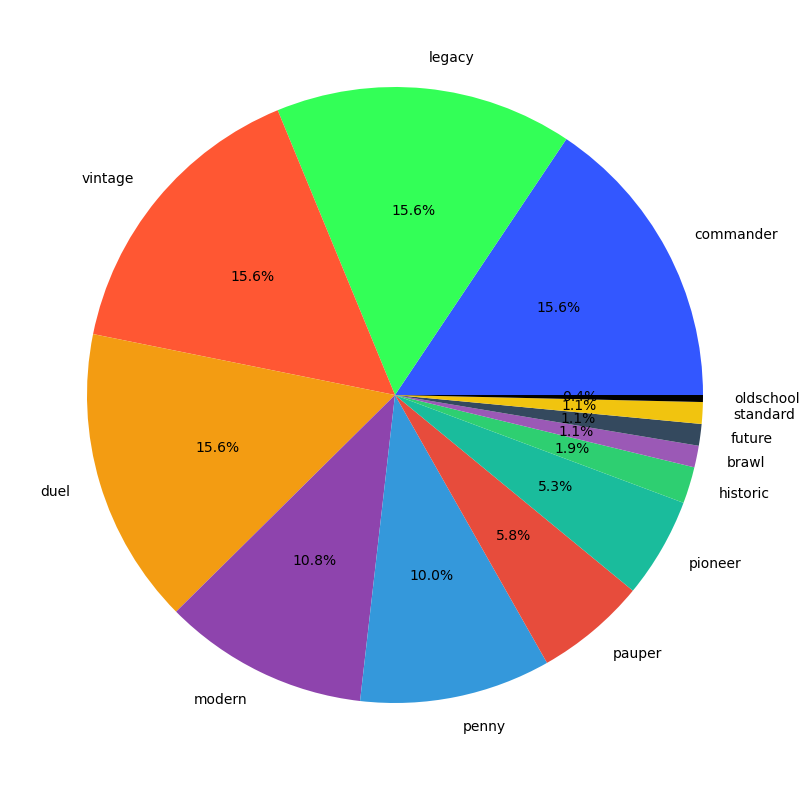

In [16]:

# Desglosar las listas de valores en la columna "legalities"
legalities_exploded = dfCartas['legalities'].explode()
# Contar la frecuencia de cada valor
legalities_count = legalities_exploded.value_counts()

colores = [
    "#3357FF",  # Rojo anaranjado
    "#33FF57",  # Verde brillante
    "#FF5733",  # Azul vivo
    "#F39C12",  # Naranja
    "#8E44AD",  # Morado
    "#3498DB",  # Azul claro
    "#E74C3C",  # Rojo
    "#1ABC9C",  # Turquesa
    "#2ECf71",  # Verde esmeralda
    "#9B59B6",  # Morado medio
    "#34495E",  # Azul oscuro
    "#F1C40F",  # Amarillo
    "#000000"   # Naranja medio
]

# Mostrar el resultado
plt.figure(figsize=(15, 10))
plt.pie(legalities_count.values, colors = colores, autopct='%1.1f%%', labels=legalities_count.index)

plt.show()

# Realizaremos otros graficos para ver datos de el dataframe de los mazos

In [18]:
dfMazos

,code,mainBoard,meta,name,releaseDate,sideBoard,type
6690f7376f4d5805d69ea329,KTK,"[{'artist': 'Zack Stella', 'borderColor': 'bla...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Abzan Siege,2014-09-26,[],Intro Pack
6690f7376f4d5805d69ea32a,C18,"[{'artist': 'Winona Nelson', 'borderColor': 'b...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Adaptive Enchantment,2018-08-10,"[{'artist': 'Johannes Voss', 'borderColor': 'b...",Commander Deck
6690f7376f4d5805d69ea32b,BTD,"[{'artist': 'Doug Chaffee', 'borderColor': 'wh...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Aerodoom,2000-10-01,[],Theme Deck
6690f7376f4d5805d69ea32c,WTH,"[{'artist': 'Douglas Shuler', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Forces,2007-12-12,[],MTGO Theme Deck
6690f7376f4d5805d69ea32d,JUD,"[{'artist': 'Ron Spears', 'borderColor': 'blac...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Razers,2002-05-27,[],Theme Deck
...,...,...,...,...,...,...,...
6690f73e6f4d5805d69ea59f,RQS,"[{'artist': 'Christopher Rush', 'borderColor':...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zakk's Second Deck,1996-06-10,[],Intro Pack
6690f73e6f4d5805d69ea5a0,BFZ,"[{'artist': 'Daniel Ljunggren', 'borderColor':...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zendikar's Rage,2015-10-02,[],Intro Pack
6690f73e6f4d5805d69ea5a1,DDP,"[{'artist': 'Zoltan Boros & Gabor Szikszai', '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zendikar,2015-08-28,[],Duel Deck
6690f73e6f4d5805d69ea5a2,HOP,"[{'artist': 'Thomas M. Baxa', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zombie Empire,2009-09-04,"[{'artist': 'Jason A. Engle', 'borderColor': '...",Planechase Deck


## Funciones para extraer los datos del dataframe para futuros analisis

In [9]:
#Funciones para agrupar datos relevantes para el analisis

#Obtenemos la suma de los precios
def sum_prices(mainBoard):
    total = 0
    for item in mainBoard:
        prices = item.get('prices', {})
        mtgo = prices.get('mtgo', {})
        price = mtgo.get('2019-11-10', 0)
        total += price
    return total
#Obtenemos la combinación de los colores del mazo
def deck_colors(mainBoard):
    colors = set()
    for item in mainBoard:
        if 'colors' in item:
            colors.update(item['colors'])
    return list(colors)

In [26]:
# Realizar la media del edhrecRank
def mean_edhrecRank(mainBoard):
    # Lista para almacenar los valores de edhrecRank antes de realizar la media
    edhrec_values = [] 
       
    for item in mainBoard:
        if isinstance(item, dict):
            edhrecRank = item.get('edhrecRank')
            # Comprobacion para evitar nulos
            if edhrecRank is not None:  
                edhrec_values.append(edhrecRank)
    
    # Retornar la media de los valores si hay valores en la lista, si no retornar NaN
    if edhrec_values:
        return np.mean(edhrec_values)
    else:
        return np.nan
    
def mean_convertedManaCost(mainBoard):
    # Lista para almacenar los valores de edhrecRank antes de realizar la media
    convertedManaCost_value = [] 
       
    for item in mainBoard:
        if isinstance(item, dict):
            convertedManaCost = item.get('convertedManaCost')
            # Comprobacion para evitar nulos
            if convertedManaCost is not None:  
                convertedManaCost_value.append(convertedManaCost)
    
    # Retornar la media de los valores si hay valores en la lista, si no retornar NaN
    if convertedManaCost_value:
        return np.mean(convertedManaCost_value)
    else:
        return np.nan
    
    
def deck_artists(mainBoard):
    artist = set()
    for item in mainBoard:
        if isinstance(item['artist'], list):  # Si la clave 'artistas' es una lista
            artist.update(item['artist'])  # Agregamos los artistas de la lista al set
        else:
            artist.add(item['artist'])  # Si es un solo artista, lo añadimos al set
    return list(artist)

In [20]:
#función para dar formato a las etiquetas
def euro_format(x, pos):
    return f'{x:,.2f}€'

In [13]:
dfMazos['total_price'] = dfMazos['mainBoard'].apply(sum_prices)
dfMazos['deck_color'] = dfMazos['mainBoard'].apply(deck_colors)

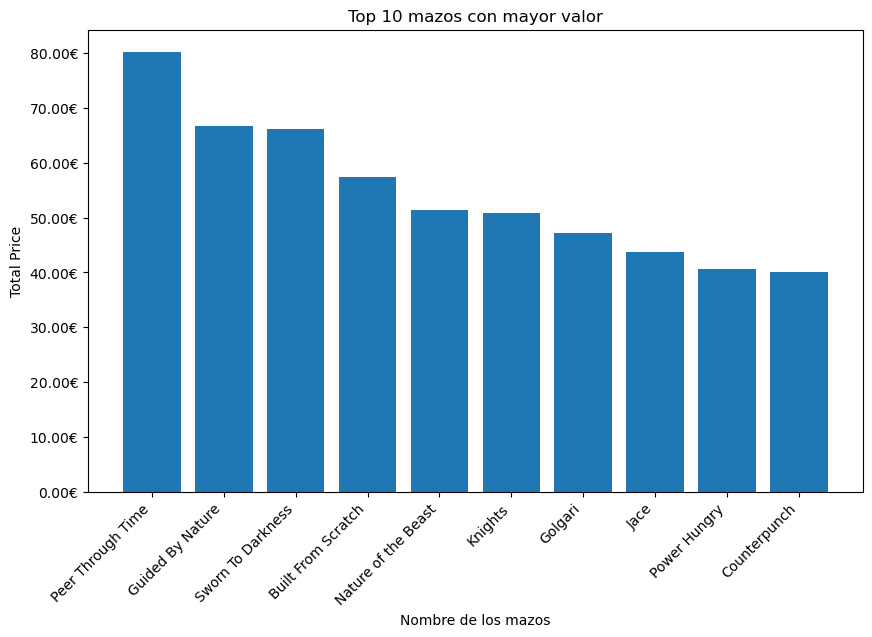

In [22]:
#Obtenemos los 10 con mayor valor
top_10 = dfMazos.nlargest(10, 'total_price')
formatter = FuncFormatter(euro_format)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_10['name'], top_10['total_price'])
plt.xlabel('Nombre de los mazos')
plt.ylabel('Total Price')
plt.title('Top 10 mazos con mayor valor')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X si es necesario
plt.show()

## En caso de querer los de menor valor deberemos filtrar ya que los datos que utilizamos poseen algunos registros que no poseen valor

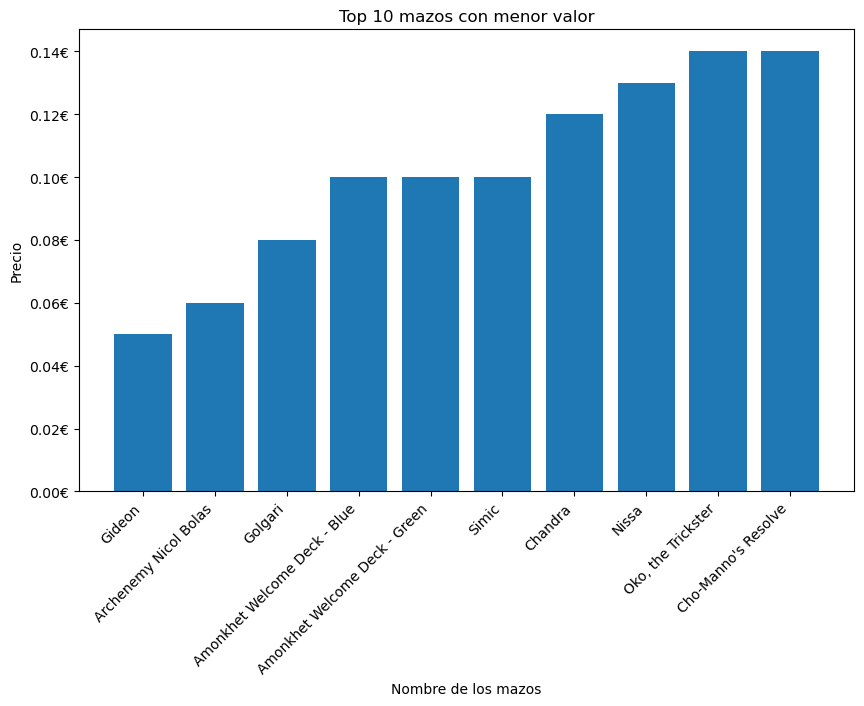

In [24]:
df_filtered = dfMazos[dfMazos['total_price'] > 0]
top_10 = df_filtered.nsmallest(10, 'total_price')

plt.figure(figsize=(10, 6))
plt.bar(top_10['name'], top_10['total_price'])
plt.xlabel('Nombre de los mazos')
plt.ylabel('Precio')
plt.title('Top 10 mazos con menor valor')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X si es necesario
plt.show()

## Sobrescriremos los cambios del dataframe ya que usaremos los cambios en los modelos de aprendizaje

In [28]:
dfMazos['edhrecRank_mean'] = dfMazos['mainBoard'].apply(mean_edhrecRank)
dfMazos['convertedManaCost_mean'] = dfMazos['mainBoard'].apply(mean_convertedManaCost)
dfMazos['artists'] = dfMazos['mainBoard'].apply(deck_artists)

dfMazos.head()

,code,mainBoard,meta,name,releaseDate,sideBoard,type,total_price,deck_color,edhrecRank_mean,convertedManaCost_mean,artists
6690f7376f4d5805d69ea329,KTK,"[{'artist': 'Zack Stella', 'borderColor': 'bla...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Abzan Siege,2014-09-26,[],Intro Pack,0.68,"[B, G, W]",6314.428571,2.709677,"[Scott Murphy, Daniel Ljunggren, Michael C. Ha..."
6690f7376f4d5805d69ea32a,C18,"[{'artist': 'Winona Nelson', 'borderColor': 'b...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Adaptive Enchantment,2018-08-10,"[{'artist': 'Johannes Voss', 'borderColor': 'b...",Commander Deck,0.00,"[U, G, W]",2145.052632,2.962025,"[Cyril Van Der Haegen, Winona Nelson, Drew Tuc..."
6690f7376f4d5805d69ea32b,BTD,"[{'artist': 'Doug Chaffee', 'borderColor': 'wh...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Aerodoom,2000-10-01,[],Theme Deck,0.00,"[U, B]",10516.052632,3.048780,"[Stephen Daniele, Colin MacNeil, Christopher R..."
6690f7376f4d5805d69ea32c,WTH,"[{'artist': 'Douglas Shuler', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Forces,2007-12-12,[],MTGO Theme Deck,2.63,"[U, W]",8699.772727,2.833333,"[Douglas Shuler, Colin MacNeil, Charles Gilles..."
6690f7376f4d5805d69ea32d,JUD,"[{'artist': 'Ron Spears', 'borderColor': 'blac...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Razers,2002-05-27,[],Theme Deck,0.68,"[U, R]",11014.800000,3.086957,"[Alan Pollack, Scott M. Fischer, Ben Thompson,..."


In [30]:
folder = 'CSV'
file = 'AllDecks.csv'
path = os.path.join(folder, file)

dfMazos.to_csv(path, index=False)